In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
# Importing necessary data libraries
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [71]:
iris_df = pd.read_csv("iris.csv")

In [72]:
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
7,8,5.0,3.4,1.5,0.2,Iris-setosa
150,151,5.9,NaN,NaN,NaN,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [73]:
iris_df.shape

(152, 6)

In [74]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [75]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [78]:
iris_df = iris_df.replace('?', np.nan)
iris_df=iris_df.fillna(iris_df.median())
iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.10,1.9,Iris-virginica
143,144,6.8,3.2,5.90,2.3,Iris-virginica
144,145,6.7,3.3,5.70,2.5,Iris-virginica
145,146,6.7,3.0,5.20,2.3,Iris-virginica
146,147,6.3,2.5,5.00,1.9,Iris-virginica
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [79]:
def f(row):
    if row['Species'] == 'Iris-setosa':
        val = 0
    elif row['Species'] == 'Iris-virginica':
        val = 2
    elif row['Species'] == 'Iris-versicolor':
        val = 1
    return val

In [80]:
iris_df['Class'] = iris_df.apply(f, axis=1)

In [81]:
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1
87,88,6.3,2.3,4.4,1.3,Iris-versicolor,1
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,1
13,14,4.3,3.0,1.1,0.1,Iris-setosa,0
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,1
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,1
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2
129,130,7.2,3.0,5.8,1.6,Iris-virginica,2
42,43,4.4,3.2,1.3,0.2,Iris-setosa,0
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

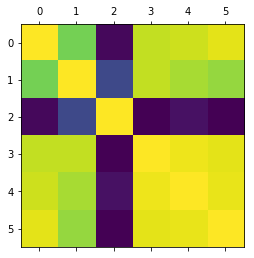

In [82]:
import matplotlib.pyplot as plt
plt.matshow(iris_df.corr())

In [83]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Class,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [ ]:
#None of the feature variables has correlation range of -0.1 to 0.1 from target variable, therefore not dropping any feature

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [84]:
iris_df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Class               0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207D8C45358>,
      dtype=object)

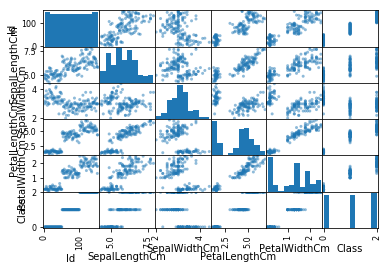

In [85]:
y=iris_df['Class']
pd.plotting.scatter_matrix(iris_df)
#sns.pairplot(df,hue='y')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [110]:
from sklearn.model_selection import train_test_split

array = iris_df.values
X = array[:,1:5]
Y=array[:,6]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [111]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)
X_train=X_train.astype(int)
X_test=X_test.astype(int)
#converting y test and train variables to int

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [135]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')

In [136]:
from sklearn.metrics import accuracy_score

NNH.fit(X_train, Y_train)
predicted_labels = NNH.predict(X_test)

accuracy_score(Y_test, predicted_labels)
#k=3;accuracy=90.3
#k=5;accuracy=93.5
#k=9; accuracy=93.5

0.9354838709677419

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [146]:
!pip install -U sklearn

Requirement not upgraded as not directly required: scikit-learn in c:\users\sahanaa_m\anaconda3\lib\site-packages (from sklearn) (0.20.0)
Requirement not upgraded as not directly required: numpy>=1.8.2 in c:\users\sahanaa_m\anaconda3\lib\site-packages (from scikit-learn->sklearn) (1.14.3)
Requirement not upgraded as not directly required: scipy>=0.13.3 in c:\users\sahanaa_m\anaconda3\lib\site-packages (from scikit-learn->sklearn) (1.1.0)
  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Sahanaa_M\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [149]:
from sklearn.model_selection import GridSearchCV

k = np.arange(1,19)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

In [164]:
GS.best_score_

0.9338842975206612

In [150]:
GS.fit(X_train,Y_train)

C:\Users\Sahanaa_M\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [155]:
cv_labels=GS.predict(X_test)

array([[5, 2, 3, 1],
       [5, 4, 1, 0],
       [5, 2, 3, 1],
       [6, 3, 4, 1],
       [5, 3, 1, 0],
       [7, 2, 6, 1],
       [6, 2, 4, 1],
       [5, 4, 1, 0],
       [5, 2, 4, 1],
       [5, 3, 1, 0],
       [6, 2, 5, 1],
       [6, 3, 4, 1],
       [6, 2, 4, 1],
       [7, 3, 5, 2],
       [5, 3, 1, 0],
       [6, 3, 4, 1],
       [5, 3, 1, 0],
       [6, 3, 6, 2],
       [5, 2, 4, 1],
       [5, 3, 4, 1],
       [6, 3, 4, 1],
       [6, 3, 5, 2],
       [5, 2, 4, 1],
       [5, 2, 4, 1],
       [5, 2, 3, 1],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [6, 2, 4, 1],
       [7, 2, 6, 2],
       [5, 3, 1, 0]])

In [161]:
acc=accuracy_score(Y_test, cv_labels)

In [163]:
mse=1-acc
mse

0.06451612903225812

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# Naive Bayes with Iris Data

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [ ]:
#Check the dataset
print(y)
print(X)

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [1]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

### Question 14 
Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [ ]:
#Predict

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [ ]:
# show Confusion Matrix

In [ ]:
# show accuracy

In [ ]:
#Show precision and Recall metrics

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [15]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779